In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load dataset from TensorFlow datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize (scale values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.9045 - loss: 0.3074 - val_accuracy: 0.9818 - val_loss: 0.0552
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9882 - val_loss: 0.0364
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9902 - loss: 0.0298 - val_accuracy: 0.9878 - val_loss: 0.0388
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9895 - val_loss: 0.0406


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9860 - loss: 0.0414

Test Accuracy: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


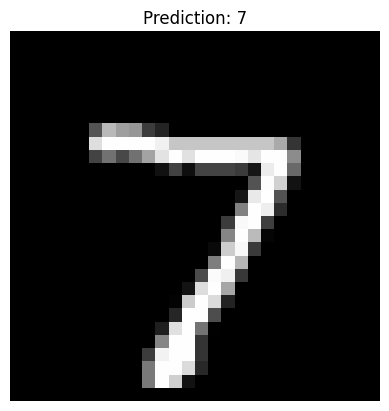

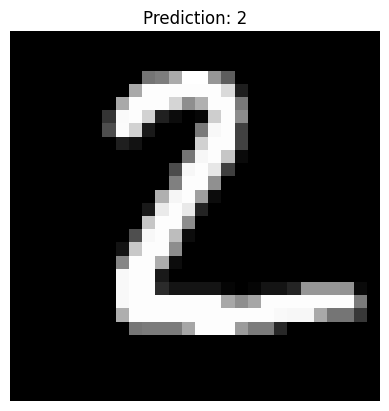

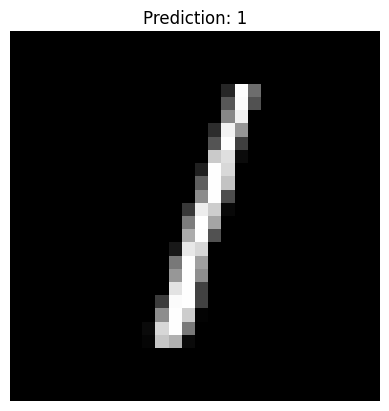

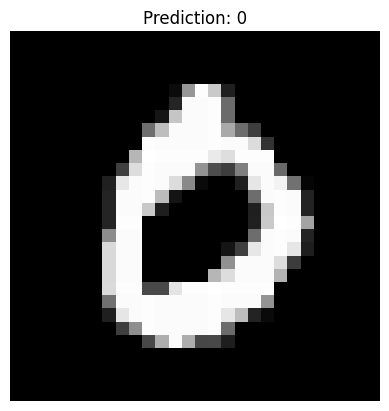

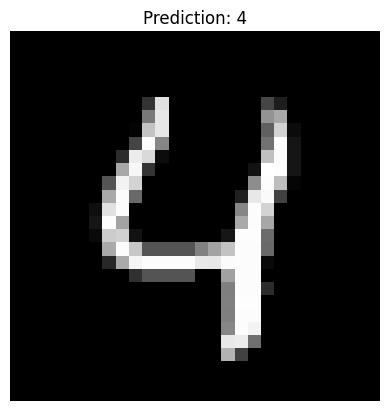

In [6]:
predictions = model.predict(x_test)

# Plot 5 test images and predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
